In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [12]:
state_regex = re.compile('^Estimated crime in (\w*)\s*$')
data_header_regex = re.compile('^Year,')

crime_by_state = {}
parser_state = 'wait_for_state'
with open("crime-by-state-source.csv") as f:
    for line in f:
        if parser_state == 'wait_for_state':
            m = state_regex.match(line)
            if m:
                state_name = m.group(1)
                parser_state = 'wait_for_data'
        elif parser_state == 'wait_for_data':
            if data_header_regex.match(line):
                parser_state = 'read_data'
                header = line.split(',')[:-1]
                data = []
        elif parser_state == 'read_data':
            if ',' in line:
                data.append(line.split(','))
            else:
                parser_state = 'wait_for_state'
                df = pd.DataFrame(data, columns=header)
                for col in df.columns:
                    df[col] = pd.to_numeric(df[col])
                df.index = df['Year']
                crime_by_state[state_name] = df
crime_by_state = pd.Panel(crime_by_state)

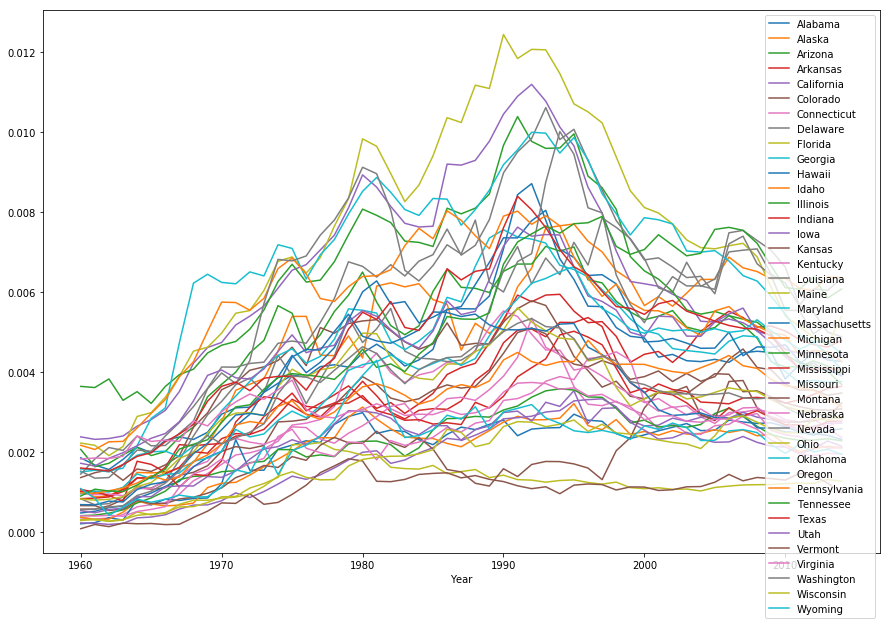

In [13]:
(crime_by_state.loc[:,:,'Violent crime total']/crime_by_state.loc[:,:,'Population']).plot(figsize=(15,10))

In [14]:
crime_total_per_capita = crime_by_state.loc[:,:,'Violent crime total']/crime_by_state.loc[:,:,'Population']

In [15]:
crime_total_per_capita.corr()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Oregon,Pennsylvania,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Wisconsin,Wyoming
Alabama,1.000000,0.776954,0.880905,0.843501,0.883472,0.781413,0.911963,0.769012,0.917326,0.943796,...,0.774309,0.827064,0.791324,0.955701,0.826700,0.617206,0.658954,0.899938,0.803399,0.759903
Alaska,0.776954,1.000000,0.821449,0.908143,0.624366,0.665781,0.797080,0.917172,0.732231,0.788262,...,0.654773,0.942081,0.915890,0.810532,0.878781,0.777427,0.475205,0.823509,0.928062,0.751744
Arizona,0.880905,0.821449,1.000000,0.781652,0.910650,0.897863,0.933369,0.798902,0.948762,0.956907,...,0.903518,0.883756,0.770952,0.930149,0.941663,0.776062,0.780746,0.969151,0.763943,0.866717
Arkansas,0.843501,0.908143,0.781652,1.000000,0.600956,0.581067,0.771654,0.932399,0.723365,0.805310,...,0.545846,0.929824,0.970195,0.844652,0.791188,0.685395,0.423232,0.784040,0.952126,0.674952
California,0.883472,0.624366,0.910650,0.600956,1.000000,0.912159,0.928419,0.587302,0.969470,0.934719,...,0.943557,0.695943,0.551439,0.897642,0.837915,0.631210,0.808309,0.932184,0.572294,0.804526
Colorado,0.781413,0.665781,0.897863,0.581067,0.912159,1.000000,0.880225,0.589213,0.871308,0.857702,...,0.933018,0.703979,0.520831,0.816996,0.835519,0.767911,0.780555,0.919059,0.561449,0.839008
Connecticut,0.911963,0.797080,0.933369,0.771654,0.928419,0.880225,1.000000,0.773746,0.963795,0.968028,...,0.905445,0.858172,0.737398,0.955344,0.914034,0.798972,0.662559,0.968349,0.785028,0.899053
Delaware,0.769012,0.917172,0.798902,0.932399,0.587302,0.589213,0.773746,1.000000,0.725328,0.791251,...,0.564094,0.964050,0.957283,0.829255,0.850682,0.721125,0.491020,0.785254,0.909298,0.719534
Florida,0.917326,0.732231,0.948762,0.723365,0.969470,0.871308,0.963795,0.725328,1.000000,0.974906,...,0.914512,0.814893,0.701044,0.958748,0.894438,0.677850,0.778748,0.957970,0.704852,0.841920
Georgia,0.943796,0.788262,0.956907,0.805310,0.934719,0.857702,0.968028,0.791251,0.974906,1.000000,...,0.880183,0.867813,0.771431,0.962566,0.907027,0.724860,0.741144,0.959768,0.773769,0.848011


** I am adding a column for Violent crime per capita to each dataframe of the _crime_\__by_\__state_ panel **

In [16]:
crime_by_state = crime_by_state.transpose(2,1,0)

In [17]:
crime_by_state

<class 'pandas.core.panel.Panel'>
Dimensions: 22 (items) x 55 (major_axis) x 40 (minor_axis)
Items axis: Year to Motor vehicle theft rate
Major_axis axis: 1960 to 2014
Minor_axis axis: Alabama to Wyoming

In [18]:
crime_by_state['Violent crime per capita'] = crime_by_state['Violent crime total']/crime_by_state['Population']
crime_by_state['Total Expenditures for Education'] = np.nan # Prepare column to accept data
crime_by_state['Total Expenditures for Education per capita'] = np.nan # Prepare column to accept data


In [19]:
from os import listdir
from os.path import isfile, join

# Adding a new column 'Violent crime per capita' to each state
# for state in crime_by_state:
#     crime_by_state[state]['Violent crime per capita'] = crime_by_state.loc[state,:,'Violent crime total']/crime_by_state.loc[state,:,'Population']
#     crime_by_state[state]['Total Expenditures for Education'] = np.nan # Prepare column to accept data
#     crime_by_state[state]['Total Expenditures for Education per capita'] = np.nan # Prepare column to accept data

files = [f for f in listdir('budget') if isfile(join('budget', f))]

** We will now add data about funding sourced from [National Center for Education Statistics](https://nces.ed.gov/ccd/stfis.asp). **

Note that according to the [documentation for Fiscal Year 2014](https://nces.ed.gov/ccd/data/txt/stfis14_1a_lay.txt):
> **Missing data are reported as "-1" in the data 
file, and nonapplicable data are reported as "-2."**

Also, according to the [documentation for Fiscal Year 1991](https://nces.ed.gov/ccd/pdf/stfis91genr.pdf):
> **NCES requests that states report 0 for items in which no activity occurred and M for items in which an
activity occurred, but no data are available. Review of the data and subsequent discussions suggests
that these practices are not always followed. In some instances, an M may have been reported when
there was no activity. Conversely, a 0 may have been used when in fact there was some activity. When
producing the final file, NCES edited some missing and 0 responses.**

In [20]:
def cutoff(dummydf):
    if len(dummydf.index) > 60:
        return len(dummydf.index) - 56 - accountfornanrows(dummydf)
    return 0

def accountfornanrows(dummydf):
    if checkfirstrow == None:
        return 0
    else:
        return 1

def checkfirstrow(dummydf):
    if dummydf.iloc[0, 0] == int and np.isnan(dummydf.iloc[0, 0]): # For some weird reason, stfis971b.xls returns str type at the first cell. Seem to be because the dtype is int64
        return 1
    else:
        return None

    
def determine_year(dummydf):
    # Get the year from the index.
    # I chose a random number inbetween because NaN frequently occurs at the beginning
    # and end of some dataframes
    year = int(dummydf.index[5])
    if year > 100:
        return year
    return 1900 + year
    
def te11col(year):
    '''1987-1988 -->
    1989-91 --> DU
    1992, 3, 4, 5, 96,97,1998, --> EJ
    1998, 1999, 2000, 2001, 2, 3, --> EF
    2004-2014 --> EK'''
    if year < 1992:
        return 'DU'
    if year < 1998:
        return 'EJ'
    if year < 2004:
        return 'EF'
    return 'EK'



funding_by_year = {}

for file in files:
    filepath = join('budget', file)
    probe = pd.read_excel(filepath, parse_cols='A, D', index_col=0)#, squeeze=True) # Apparently, two columns are needed to accurately determine column depth
    year = determine_year(probe)
    #Note:
    # A: Year
    # D: State
    # te11col(year): location ot TE11 column
    data = pd.read_excel(filepath, parse_cols='A, D, '+ te11col(year), skiprows=[checkfirstrow(probe)], skip_footer=cutoff(probe),
                         na_values=[-1, -1.0, 'M'], header=0,index_col=1)#, index_col=0) # For some weird reason, the -1 in stfis051b.xls is not being replaced
    data["SURVYEAR"] = year
    for column in data.columns:
        data[column] = pd.to_numeric(data[column])
        data[column]
    funding_by_year[year] = data
    

funding_by_year = pd.Panel(funding_by_year)  #Produced the error: InvalidIndexError: Reindexing only valid with uniquely valued Index objects

C:\Users\AACE~1\AppData\Local\conda\conda\envs\quant\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
C:\Users\AACE~1\AppData\Local\conda\conda\envs\quant\lib\site-packages\ipykernel_launcher.py:55: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead


From the result above, it appears that the total expenditure (TE11) was not collected between **1988-1989**. This is mentioned on page 4 of [the documentation for the fiscal year 1987](https://nces.ed.gov/ccd/pdf/stfis87genr.pdf):

> **"Beginning with the FY 1989 collection, the CCD State Fiscal survey underwent a major revision. The
crosswalk (below) indicates the changes in the variable names. The expenditures in the pre-FY 1989
files may contain some expenditures by state education agencies that are excluded from the NPEFS
(post-FY 1988) survey."**

We now populate the available figures for public expenditure in the original Numpy Panel object, **crime_by_state**:

In [25]:
crime_by_state['Total Expenditures for Education'] = funding_by_year.loc[:,:,'TE11'].transpose()

In [29]:
# for year in funding_by_year:
#     for state in crime_by_state:
#         crime_by_state[state]['Total Expenditures for Education'][year] = funding_by_year[year]['TE11'][state]
    
# for state in crime_by_state:
#     print(crime_by_state[state]['Total Expenditures for Education'])
#     print(state)
# Observation: Some states in the second data source are not present in the first data source, e.g. Guam
crime_by_state['Total Expenditures for Education']


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Oregon,Pennsylvania,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** Next, we normalize the "Total Expenditures for Education" by calculating the Total Expenditures for Education per capita **

In [ ]:
# for state in crime_by_state:
#     crime_by_state[state]['Total Expenditures for Education per capita'] = crime_by_state.loc[state,:,'Total Expenditures for Education']/crime_by_state.loc[state,:,'Population']
#     print(crime_by_state[state]['Total Expenditures for Education per capita'])

In [30]:
crime_by_state['Total Expenditures for Education per capita'] = crime_by_state.loc['Total Expenditures for Education']/crime_by_state.loc['Population']


**For now, it appears that we are done collating data. The next phase is gaining insights from the data. We have to correlate the crime rate with public spending. We might need to take account of complicating factors like the time lag between change in public spending and any societal effect like reduction in crime rate.**

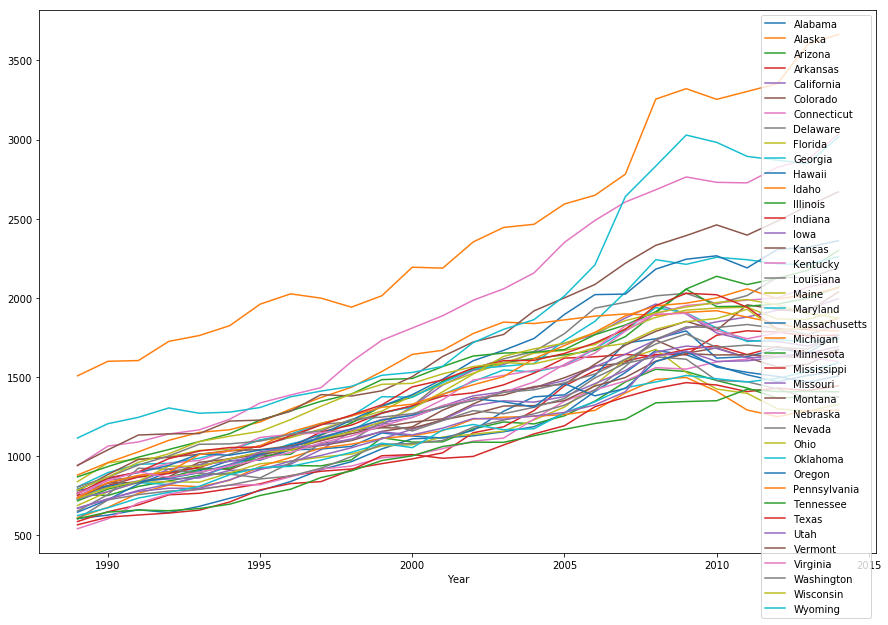

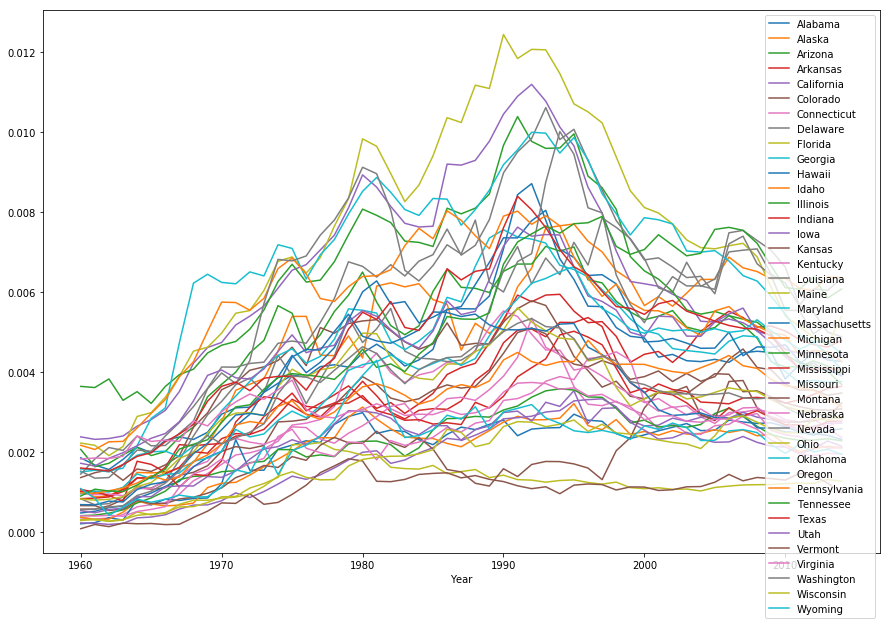

In [34]:
crime_by_state['Total Expenditures for Education per capita'].plot(figsize=(15,10))
(crime_by_state['Violent crime total']/crime_by_state['Population']).plot(figsize=(15,10))

In [51]:
education = crime_by_state['Total Expenditures for Education per capita']
crime = (crime_by_state['Violent crime total']/crime_by_state['Population'])

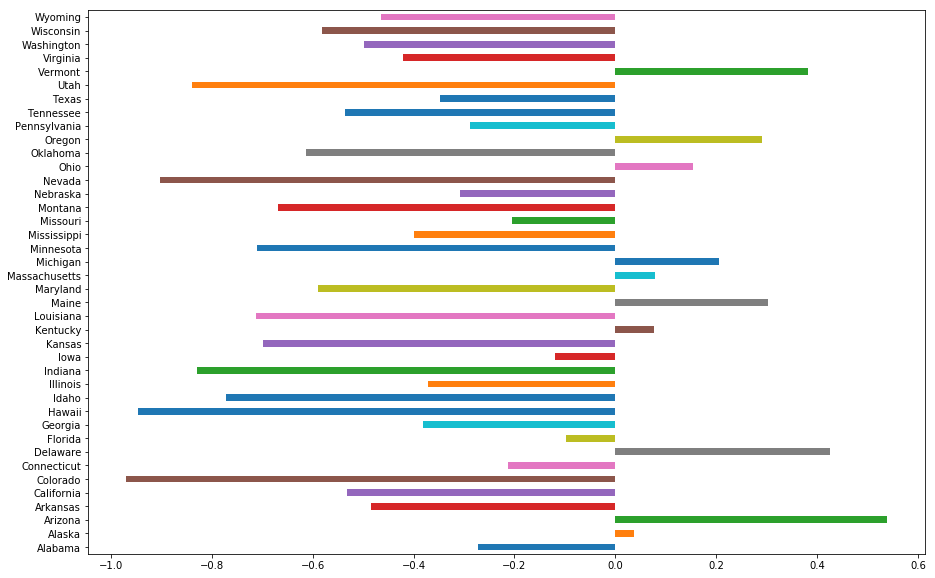

In [68]:
crime.pct_change().corrwith(education.pct_change().shift(20)).plot(kind='barh', figsize=(15,10))

In [48]:
df = pd.DataFrame({
    "education": crime_by_state['Total Expenditures for Education per capita'].mean(),
    "crime": 1/(crime_by_state['Violent crime total']/crime_by_state['Population']).mean(),
})

In [44]:
df /= df.max()

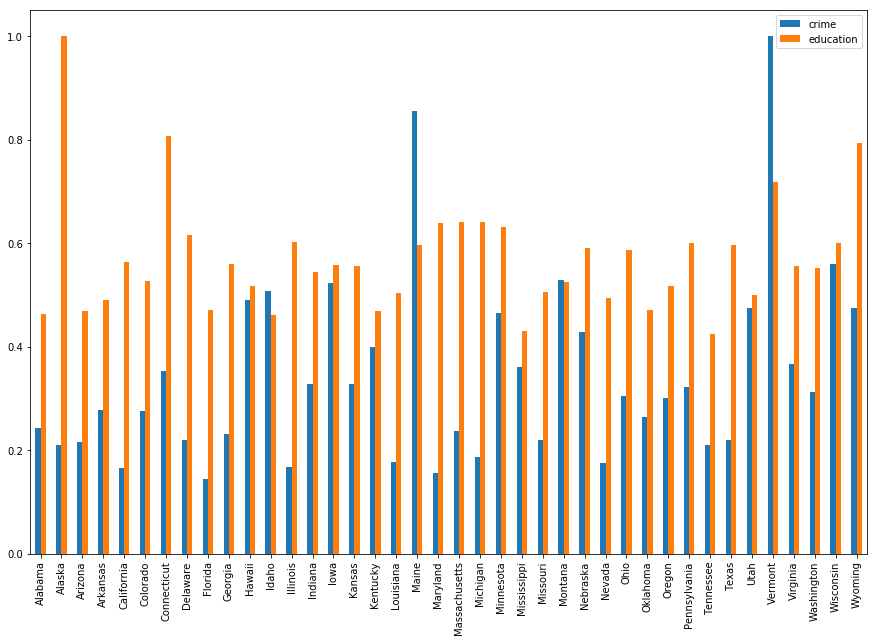

In [45]:
df.plot(kind='bar', figsize=(15,10))